In [2]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


rate_jac (generic function with 1 method)

In [3]:
using JLD2, CairoMakie, GLMakie

In [4]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:];

In [5]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Map LSE\\Hopf_Fold")

In [6]:
len = 250
map_dim = " $(len)x$(len) "
name = " tau_D article2 for Hopf Fold Hom"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

"u0s 250x250  tau_D article2 for Hopf Fold Hom.jld2"

In [7]:
Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

I0range = range( -0.7, -4.00,  length = len )
U0range = range( 0.4,  0.0, length = len )

0.4:-0.001606425702811245:0.0

In [8]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\bifurcationkit\\")

In [9]:
hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"]

91-element Vector{Float64}:
 0.3901567903532747
 0.3461954846634869
 0.3082820488473429
 0.27608592192606424
 0.24915336768657753
 0.22696246551374047
 0.20981728228362698
 0.19663272207756619
 0.18655328440759966
 0.17891142430972595
 ⋮
 0.29459453643481387
 0.3069240895655428
 0.3191371960109477
 0.33144099315256126
 0.3446389129267006
 0.3588875443011408
 0.3743528348716541
 0.3912186254316248
 0.4

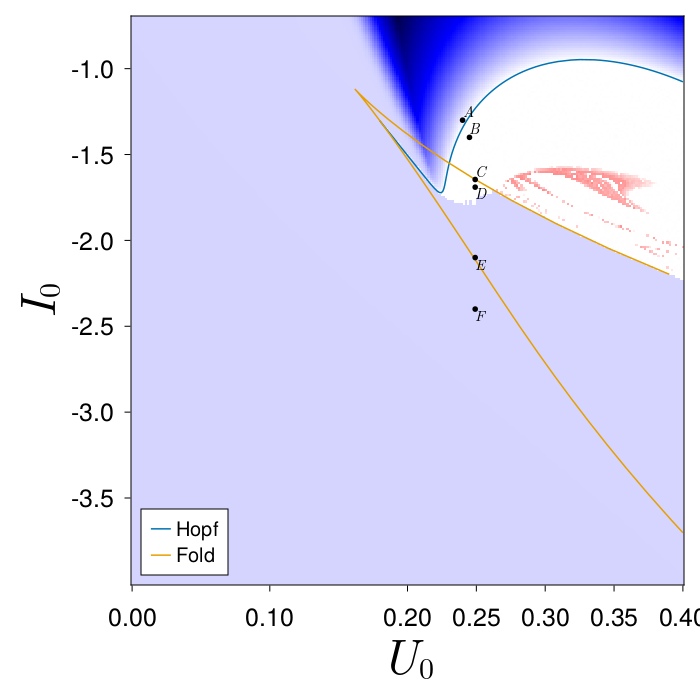

In [16]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

I0start, I0end = 1, 250 #80, 200

U0start, U0end = 1, 250 #110, 120

CairoMakie.activate!()
f = Figure(resolution = (700, 700))
ticksize = 25
tickpad = 10.0
textsize = 15

ax = Axis(f[1, 1], xlabel = L"U_0",ylabel = L"I_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad,
            xticks = [0.0, 0.10, 0.20, 0.25, 0.30, 0.35, 0.40],
            yticks = [-1.0, -1.5, -2.0, -2.5, -3.0, -3.5])

hm = heatmap!(ax, U0range[U0start:U0end], I0range[I0start:I0end], transpose(Λs[I0start:I0end, U0start:U0end, index]),
colormap = :seismic, colorrange = (mn, mx))

lines!(ax, hp_codim2_1U0, hp_codim2_1I0, label = "Hopf")
lines!(ax, sn_codim2_1U0, sn_codim2_1I0, label = "Fold")

"""index_fold = 100
lines!(ax, U0_Fold[1:index_fold], I0_Fold[1:index_fold], color = :deeppink)"""

scatter!(ax, 0.24, -1.3, markersize = 8, color = :black)
text!(ax, 0.24, -1.3, text = L"A", fontsize = textsize)

scatter!(ax, 0.245, -1.4, markersize = 8, color = :black)
text!(ax, 0.245, -1.4, text = L"B", fontsize = textsize)

scatter!(ax, 0.24915304713569425, -1.6454112848630975, markersize = 8, color = :black)
text!(ax, 0.24915304713569425, -1.6454112848630975, text = L"C", fontsize = textsize)

scatter!(ax, 0.24915304713569425, -1.69, markersize = 8, color = :black)
text!(ax, 0.24915304713569425, -1.69, text = L"D", fontsize = textsize, align = (:left, :top))



scatter!(ax, 0.24915304713569425, -2.1, markersize = 8, color = :black)
text!(ax, 0.24915304713569425, -2.1, text = L"E", fontsize = textsize, align = (:left, :top))


scatter!(ax, 0.24915304713569425, -2.4, markersize = 8, color = :black)
text!(ax, 0.24915304713569425, -2.4, text = L"F", fontsize = textsize, align = (:left, :top))

axislegend(ax, position = :lb, labelsize = 20)
display(f);

In [ ]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

I0start, I0end = 1, 250 #80, 200
U0start, U0end = 1, 250 #110, 120

f = Figure(resolution = (700, 700))
ticksize = 25
tickpad = 10.0

ax1 = Axis(f[1, 1], xlabel = L"U_0",ylabel = L"I_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax1, U0range[U0start:U0end], I0range[I0start:I0end], transpose(Λs[I0start:I0end, U0start:U0end, index]),
colormap = :seismic, colorrange = (mn, mx))

lines!(ax1, hp_codim2_1U0, hp_codim2_1I0)
lines!(ax1, sn_codim2_1U0, sn_codim2_1I0)

#scatter!(ax1, hp_codim2_1U0[1], hp_codim2_1I0[1], markersize = 8)
#scatter!(ax1, hp_codim2_1U0[34], hp_codim2_1I0[34], markersize = 8)

#scatter!(ax1, sn_codim2_1U0[16], sn_codim2_1I0[16], markersize = 8)
#scatter!(ax1, sn_codim2_1U0[44], sn_codim2_1I0[44], markersize = 8)

index_sn = 5
scatter!(ax1, sn_codim2_1U0[index_sn], sn_codim2_1I0[index_sn], markersize = 8, color = :deeppink)

scatter!(ax1, 0.24915304713569425, -1.60, markersize = 8, color = :blue)
scatter!(ax1, 0.24915304713569425, -1.4, markersize = 8, color = :green)
scatter!(ax1, 0.24915304713569425, -1.66, markersize = 8, color = :lime)
scatter!(ax1, 0.228, -1.72, markersize = 8, color = :red)
scatter!(ax1, 0.26, -1.65, markersize = 8, color = :black)


index_sn2 = 80
scatter!(ax1, sn_codim2_1U0[index_sn2], sn_codim2_1I0[index_sn2], markersize = 8, color = :white)

scatter!(ax1, 0.25451205475942584, -2.1, markersize = 8, color = :cyan)
scatter!(ax1, 0.25451205475942584, -1.7, markersize = 8, color = :darkviolet)


scatter!(ax1, 0.39, -2.2, markersize = 8, color = :skyblue2)

scatter!(ax1, 0.39, -2.0, markersize = 8, color = :darkgoldenrod1)

CairoMakie.activate!()
display(f);

In [78]:
sn_codim2_1U0[index_sn], sn_codim2_1I0[index_sn]

(0.24915304713569425, -1.6454112848630975)

In [55]:
sn_codim2_1U0[index_sn2], sn_codim2_1I0[index_sn2]

(0.25451205475942584, -2.1778946301041473)

In [17]:
pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\map_with_curve.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}


In [86]:
GLMakie.activate!()
display(GLMakie.Screen(), f);